In [127]:
import networkx as nx

g=nx.Graph()#创建空的无向图
#g=nx.DiGraph()#创建空的有向图

g.add_node(1)
g.add_nodes_from([2,3,4])
g.nodes()
#NodeView((1, 2,3,4))


NodeView((1, 2, 3, 4))

In [128]:
g.add_node(1,name='n1',weight=1)
g.add_node(2,name='n2',weight=1.2)

g._node


{1: {'name': 'n1', 'weight': 1},
 2: {'name': 'n2', 'weight': 1.2},
 3: {},
 4: {}}

In [129]:
g.nodes(data=True)

NodeDataView({1: {'name': 'n1', 'weight': 1}, 2: {'name': 'n2', 'weight': 1.2}, 3: {}, 4: {}})

In [130]:
g.nodes[1]

{'name': 'n1', 'weight': 1}

In [131]:
g.nodes[1]['name']

'n1'

In [132]:
list(g.nodes(data=True))

[(1, {'name': 'n1', 'weight': 1}),
 (2, {'name': 'n2', 'weight': 1.2}),
 (3, {}),
 (4, {})]

删除节点：

In [133]:
g.remove_node(3)

In [134]:
g.nodes()

NodeView((1, 2, 4))

删除顶点的属性：

In [135]:
del g.nodes[1]['weight']

In [136]:
g.nodes

NodeView((1, 2, 4))

In [137]:
g.nodes(data=True)

NodeDataView({1: {'name': 'n1'}, 2: {'name': 'n2', 'weight': 1.2}, 4: {}})

In [138]:
g.has_node(1)

True

In [139]:
g.has_node(5)

False

### 图的边

In [140]:
g.add_edge(2,3)
g.add_edges_from([(1,2), (1,3)])

In [141]:
g.edges()

EdgeView([(1, 2), (1, 3), (2, 3)])

边中增加属性，例如权重，关系等：

In [142]:
g.add_edge(1,2,weight=4.7,relationship="renew")

In [143]:
g.edges()

EdgeView([(1, 2), (1, 3), (2, 3)])

In [144]:
g.edges(data=True)

EdgeDataView([(1, 2, {'weight': 4.7, 'relationship': 'renew'}), (1, 3, {}), (2, 3, {})])

设置边的权重非常重要，有专门的函数，该函数的参数是三元组，前2个字段是顶点的ID属性，用于标识一个边，第三个字段是边的权重：

In [145]:
g.add_weighted_edges_from([(1,2,0.125),(1,3,0.75),(2,4,1.2),(3,4,0.375)])

在增加边时，也可以一次增加多条边，为不同边设置不同的属性：

In [146]:
g.add_edges_from([(1,2,{'color':'blue'}), (2,3,{'weight':8})])

In [147]:
g.edges(data=True)

EdgeDataView([(1, 2, {'weight': 0.125, 'relationship': 'renew', 'color': 'blue'}), (1, 3, {'weight': 0.75}), (2, 3, {'weight': 8}), (2, 4, {'weight': 1.2}), (4, 3, {'weight': 0.375})])

In [148]:
g[1][2]

{'weight': 0.125, 'relationship': 'renew', 'color': 'blue'}

In [149]:
g.get_edge_data(1,2)

{'weight': 0.125, 'relationship': 'renew', 'color': 'blue'}

In [150]:
g.remove_edge(1,2)

In [151]:
g.edges(data=True)

EdgeDataView([(1, 3, {'weight': 0.75}), (2, 3, {'weight': 8}), (2, 4, {'weight': 1.2}), (4, 3, {'weight': 0.375})])

更新边的属性

In [152]:
g[1][3]['weight'] = 4.9

g[1][3].update({"weight":4.01})


In [153]:
g.edges[1,3].update({"weight":4.02})

In [154]:
g.edges(data=True)

EdgeDataView([(1, 3, {'weight': 4.02}), (2, 3, {'weight': 8}), (2, 4, {'weight': 1.2}), (4, 3, {'weight': 0.375})])

In [155]:
del g[2][3]['weight']

检查边是否存在：

In [156]:
g.has_edge(1,2)

False

In [157]:
g.has_edge(2,3)

True

### 图的属性

In [158]:
g.adj[1][3]

{'weight': 4.02}

In [159]:
g.adj

AdjacencyView({1: {3: {'weight': 4.02}}, 2: {3: {}, 4: {'weight': 1.2}}, 4: {2: {'weight': 1.2}, 3: {'weight': 0.375}}, 3: {2: {}, 1: {'weight': 4.02}, 4: {'weight': 0.375}}})

In [160]:
g.adj[1]

AtlasView({3: {'weight': 4.02}})

In [161]:
g.edges

EdgeView([(1, 3), (2, 3), (2, 4), (4, 3)])

In [162]:
g.edges.data()

EdgeDataView([(1, 3, {'weight': 4.02}), (2, 3, {}), (2, 4, {'weight': 1.2}), (4, 3, {'weight': 0.375})])

In [163]:
g.nodes

NodeView((1, 2, 4, 3))

In [164]:
g.nodes.data()

NodeDataView({1: {'name': 'n1'}, 2: {'name': 'n2', 'weight': 1.2}, 4: {}, 3: {}})

In [165]:
g.nodes(data=True)

NodeDataView({1: {'name': 'n1'}, 2: {'name': 'n2', 'weight': 1.2}, 4: {}, 3: {}})

In [166]:
g.degree

DegreeView({1: 1, 2: 2, 4: 2, 3: 3})

In [167]:
g.degree()

DegreeView({1: 1, 2: 2, 4: 2, 3: 3})

### 图的遍历

In [168]:
g[1]

AtlasView({3: {'weight': 4.02}})

In [169]:
g.adj[1]

AtlasView({3: {'weight': 4.02}})

In [170]:
g.neighbors(1)

In [171]:
for n,nbrs in g.adjacency():
    print(n, nbrs)

1 {3: {'weight': 4.02}}
2 {3: {}, 4: {'weight': 1.2}}
4 {2: {'weight': 1.2}, 3: {'weight': 0.375}}
3 {2: {}, 1: {'weight': 4.02}, 4: {'weight': 0.375}}


In [172]:
for n,nbrs in g.adj.items():
    print(n, nbrs)

1 {3: {'weight': 4.02}}
2 {3: {}, 4: {'weight': 1.2}}
4 {2: {'weight': 1.2}, 3: {'weight': 0.375}}
3 {2: {}, 1: {'weight': 4.02}, 4: {'weight': 0.375}}


In [173]:
for n,nbrs in g.adjacency():
    print(n, nbrs)
    for nbr, attr in nbrs.items():
        print('\t', nbr, attr)

1 {3: {'weight': 4.02}}
	 3 {'weight': 4.02}
2 {3: {}, 4: {'weight': 1.2}}
	 3 {}
	 4 {'weight': 1.2}
4 {2: {'weight': 1.2}, 3: {'weight': 0.375}}
	 2 {'weight': 1.2}
	 3 {'weight': 0.375}
3 {2: {}, 1: {'weight': 4.02}, 4: {'weight': 0.375}}
	 2 {}
	 1 {'weight': 4.02}
	 4 {'weight': 0.375}


### 绘制graph

NetworkXError: random_state_index is incorrect

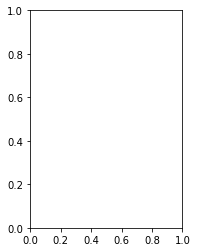

In [174]:
import matplotlib.pyplot as plt
G = nx.petersen_graph()
plt.subplot(121)

nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)

nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

In [175]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.cycle_graph(24)
pos = nx.spring_layout(G, iterations=200)
nx.draw(G, pos, node_color=range(24), node_size=800, cmap=plt.cm.Blues)
plt.show()

NetworkXError: random_state_index is incorrect

In [176]:
from matplotlib import pyplot as plt
import networkx as nx
g=nx.Graph()
g.add_nodes_from([1,2,3])
g.add_edges_from([(1,2),(1,3)])
nx.draw_networkx(g)
plt.show()

NetworkXError: random_state_index is incorrect

### 计算每个顶点的PageRank值

每个顶点的PageRank（简称PR）值，是访问顶点的概率，可以通过networkx.pagerank()函数来计算，该函数根据顶点的入边和边的权重来计算顶点的PR值，也就是说，PR值跟顶点的入边有关，跟入边的weight（权重）属性有关：

`pagerank(g, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight', dangling=None)`

常用参数注释：

g：无向图会被转换为有向图，一条无向边转换为两条有向边；
alpha：阻尼参数，默认值是0.85，取值范围为 0 到 1, 代表从图中某一特定点指向其他任意点的概率；
weight：默认值是weight，表示使用edge的weight属性作为权重，如果没有指定，那么把edge的权重设置为1；

In [ ]:
g=nx.DiGraph()
g.add_weighted_edges_from([('A','B',0.5),('A','C',0.5)])
print(nx.pagerank(g))

In [ ]:
g['A']['C']['weight']=1
print(nx.pagerank(g))    

In [ ]:
pr=nx.pagerank(g)
#page_rank_value=pr[node]
for node, pageRankValue in pr.items():
    print("%s,%.4f" %(node,pageRankValue))